# Imports

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fasttext
import warnings
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import normaltest
from nltk import pos_tag_sents
from collections import Counter
import nltk
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [47]:
data = pd.read_csv("/kaggle/input/russian-propaganda-dataset/russian-propaganda.cleaned.csv")[["text"]]
data["text"] = data["text"].astype(str)

In [48]:
print(f"Dataset length:{len(data)}")

Dataset length:6029


# Wordcloud

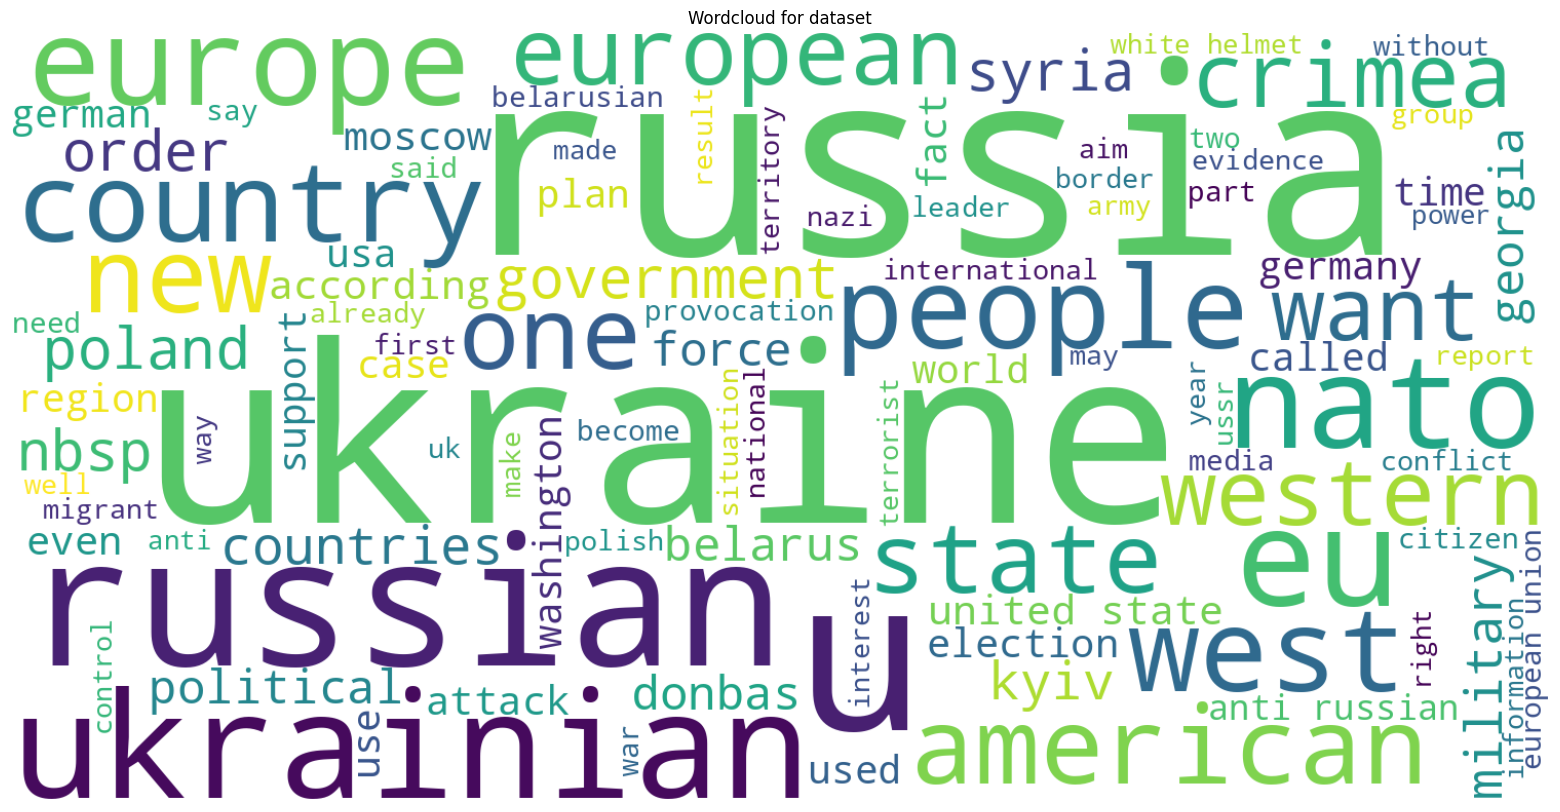

In [50]:
plt.figure(figsize=(20, 10))
wc = WordCloud(
    stopwords=STOPWORDS,
    background_color="white",
    contour_width=2,
    contour_color="orange",
    width=1500,
    height=750,
    max_words=100,
    max_font_size=256,
    random_state=42,
)
wc.generate(" ".join(data["text"]))
plt.title("Wordcloud for dataset")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Distribution of title length (characters)

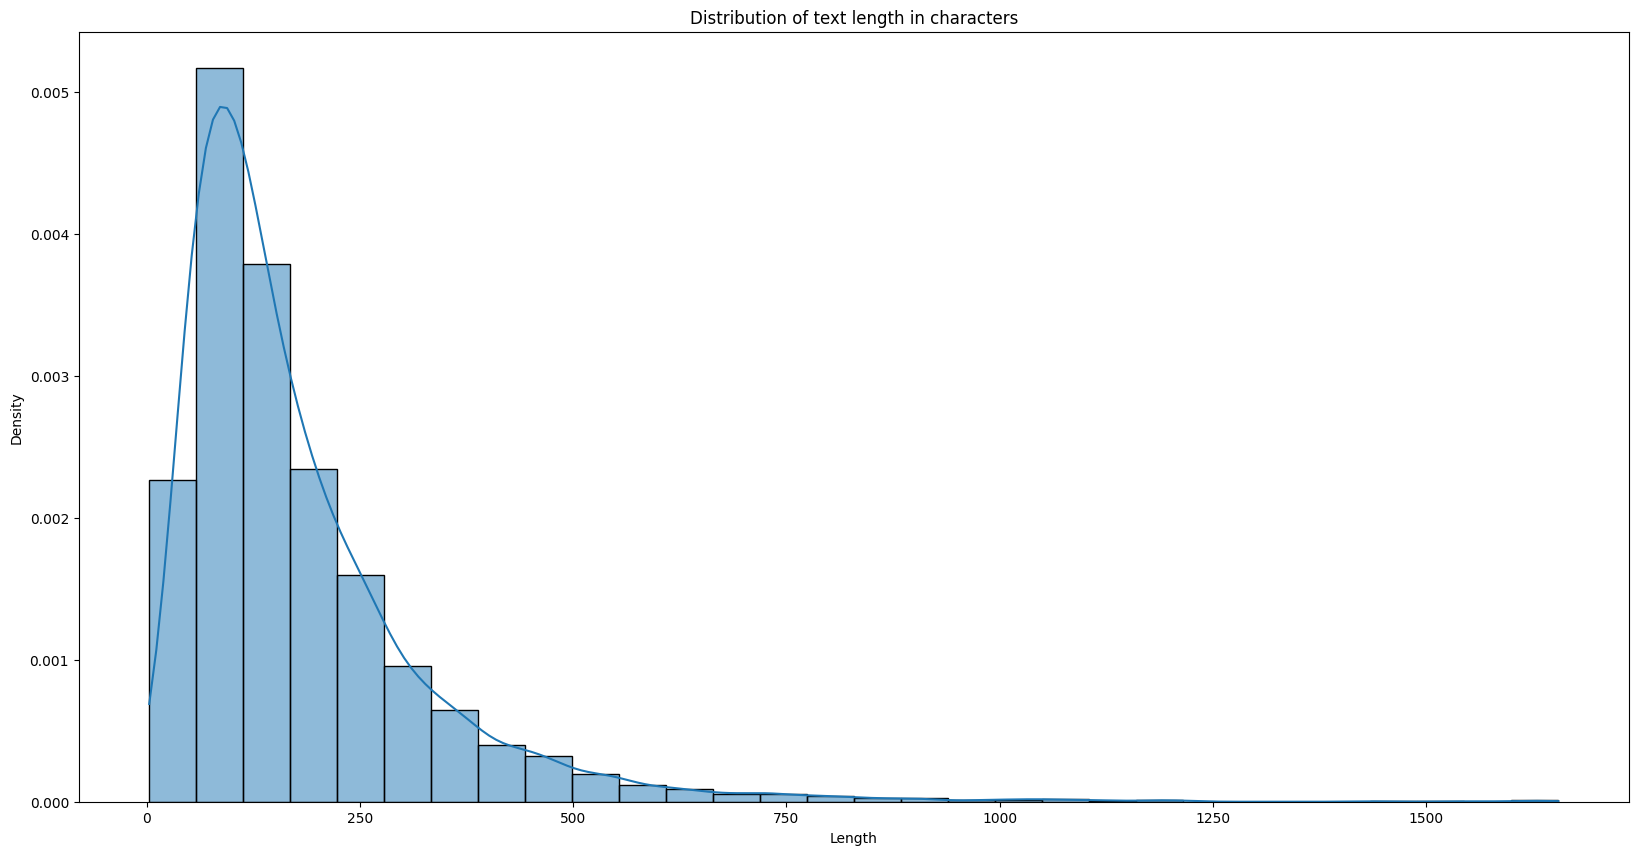

In [51]:
data["text_length_char"] = data["text"].str.len()
plt.figure(figsize=(20, 10))
plt.title(f"Distribution of text length in characters")
sns.histplot(data=data, x="text_length_char", kde=True, stat="density", bins=30)
plt.xlabel("Length")
plt.show()

In [52]:
data["text_length_char"].quantile(q=[0.05, 0.5, 0.95])

0.05     43.0
0.50    134.0
0.95    456.0
Name: text_length_char, dtype: float64

# Distribution of title length (words)

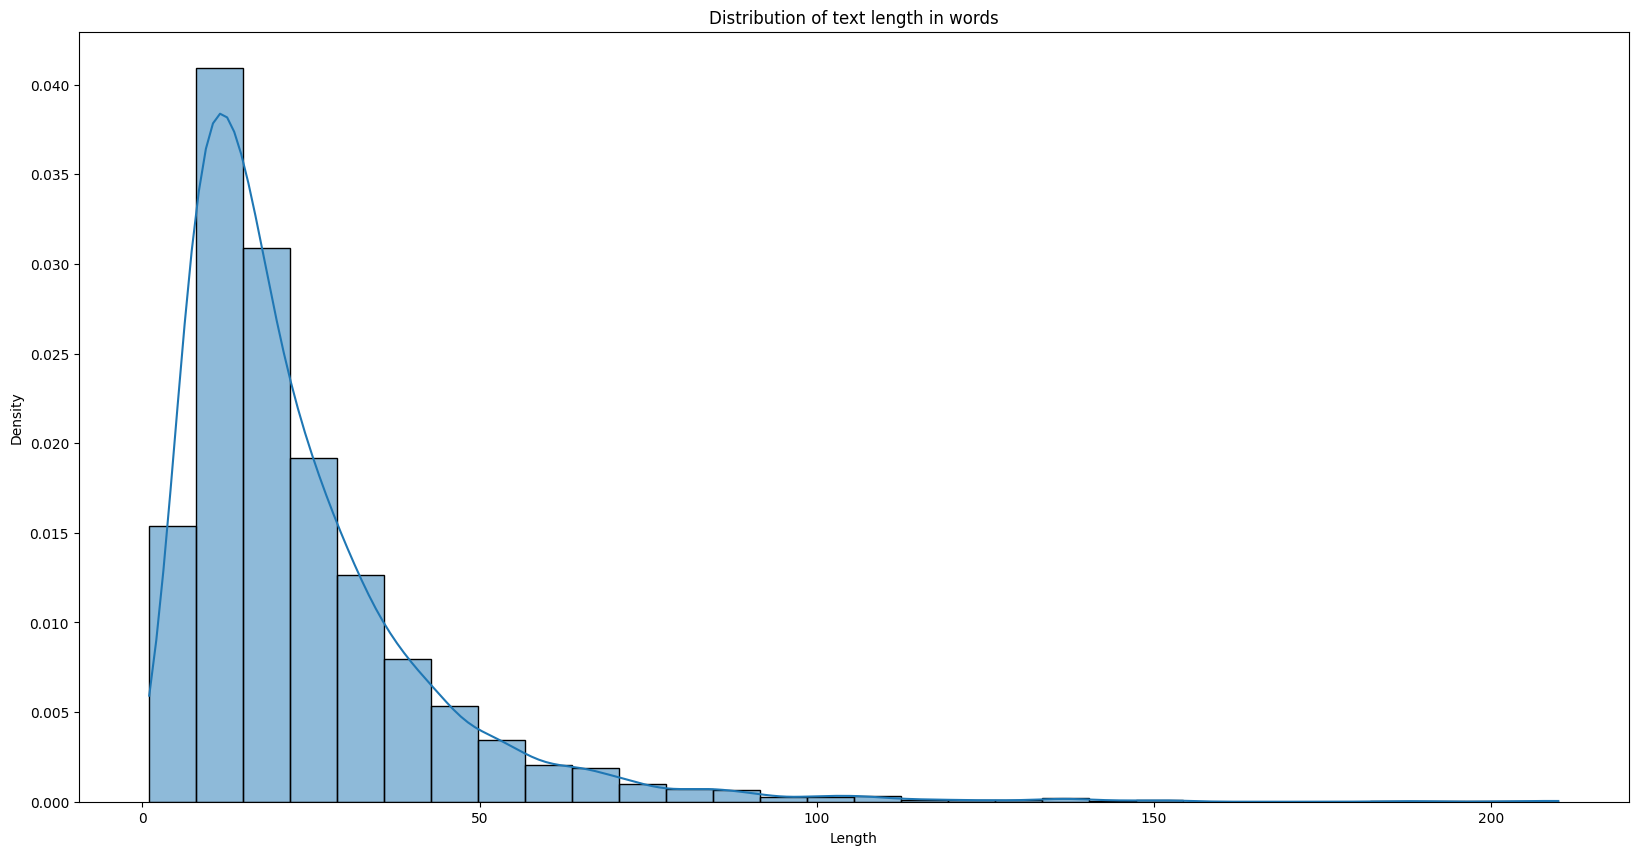

In [53]:
data["text_length_words"] = data["text"].map(lambda x: len(x.split()))
p_value = normaltest(data["text_length_words"])[1]
plt.figure(figsize=(20, 10))
plt.title(f"Distribution of text length in words")
sns.histplot(data=data, x="text_length_words", kde=True, stat="density", bins=30)
plt.xlabel("Length")
plt.show()

In [57]:
data["text_length_words"].quantile(q=[0.05, 0.5, 0.95])

0.05     6.0
0.50    17.0
0.95    58.0
Name: text_length_words, dtype: float64

# N-gram distributions

In [58]:
def get_n_grams(corpus: np.array, gram_size: int,
                top_n: int) -> pd.DataFrame:
    vec = CountVectorizer(ngram_range=(gram_size, gram_size))
    vec.fit(corpus)
    bag_of_words = vec.transform(corpus)
    gram_freq = bag_of_words.sum(axis=0)
    gram_freq = [
        [gram, gram_freq[0, idx]]
        for gram, idx in vec.vocabulary_.items()
    ]
    gram_freq = sorted(gram_freq, key=lambda x: x[1], reverse=True)
    gram_freq = pd.DataFrame([
        [gram[0], gram[1]] for gram in gram_freq[:top_n]],
        columns=[f'{gram_size}-gram', 'Frequency'])
    return gram_freq

In [59]:
def plot_grams(gram_freqs: pd.DataFrame, ax):
    ax.set_title(f"Top {len(gram_freqs)} most frequent {gram_freqs.columns[0]}")
    sns.barplot(data=gram_freqs, y=gram_freqs.columns[0], x='Frequency', palette="crest", ax=ax)

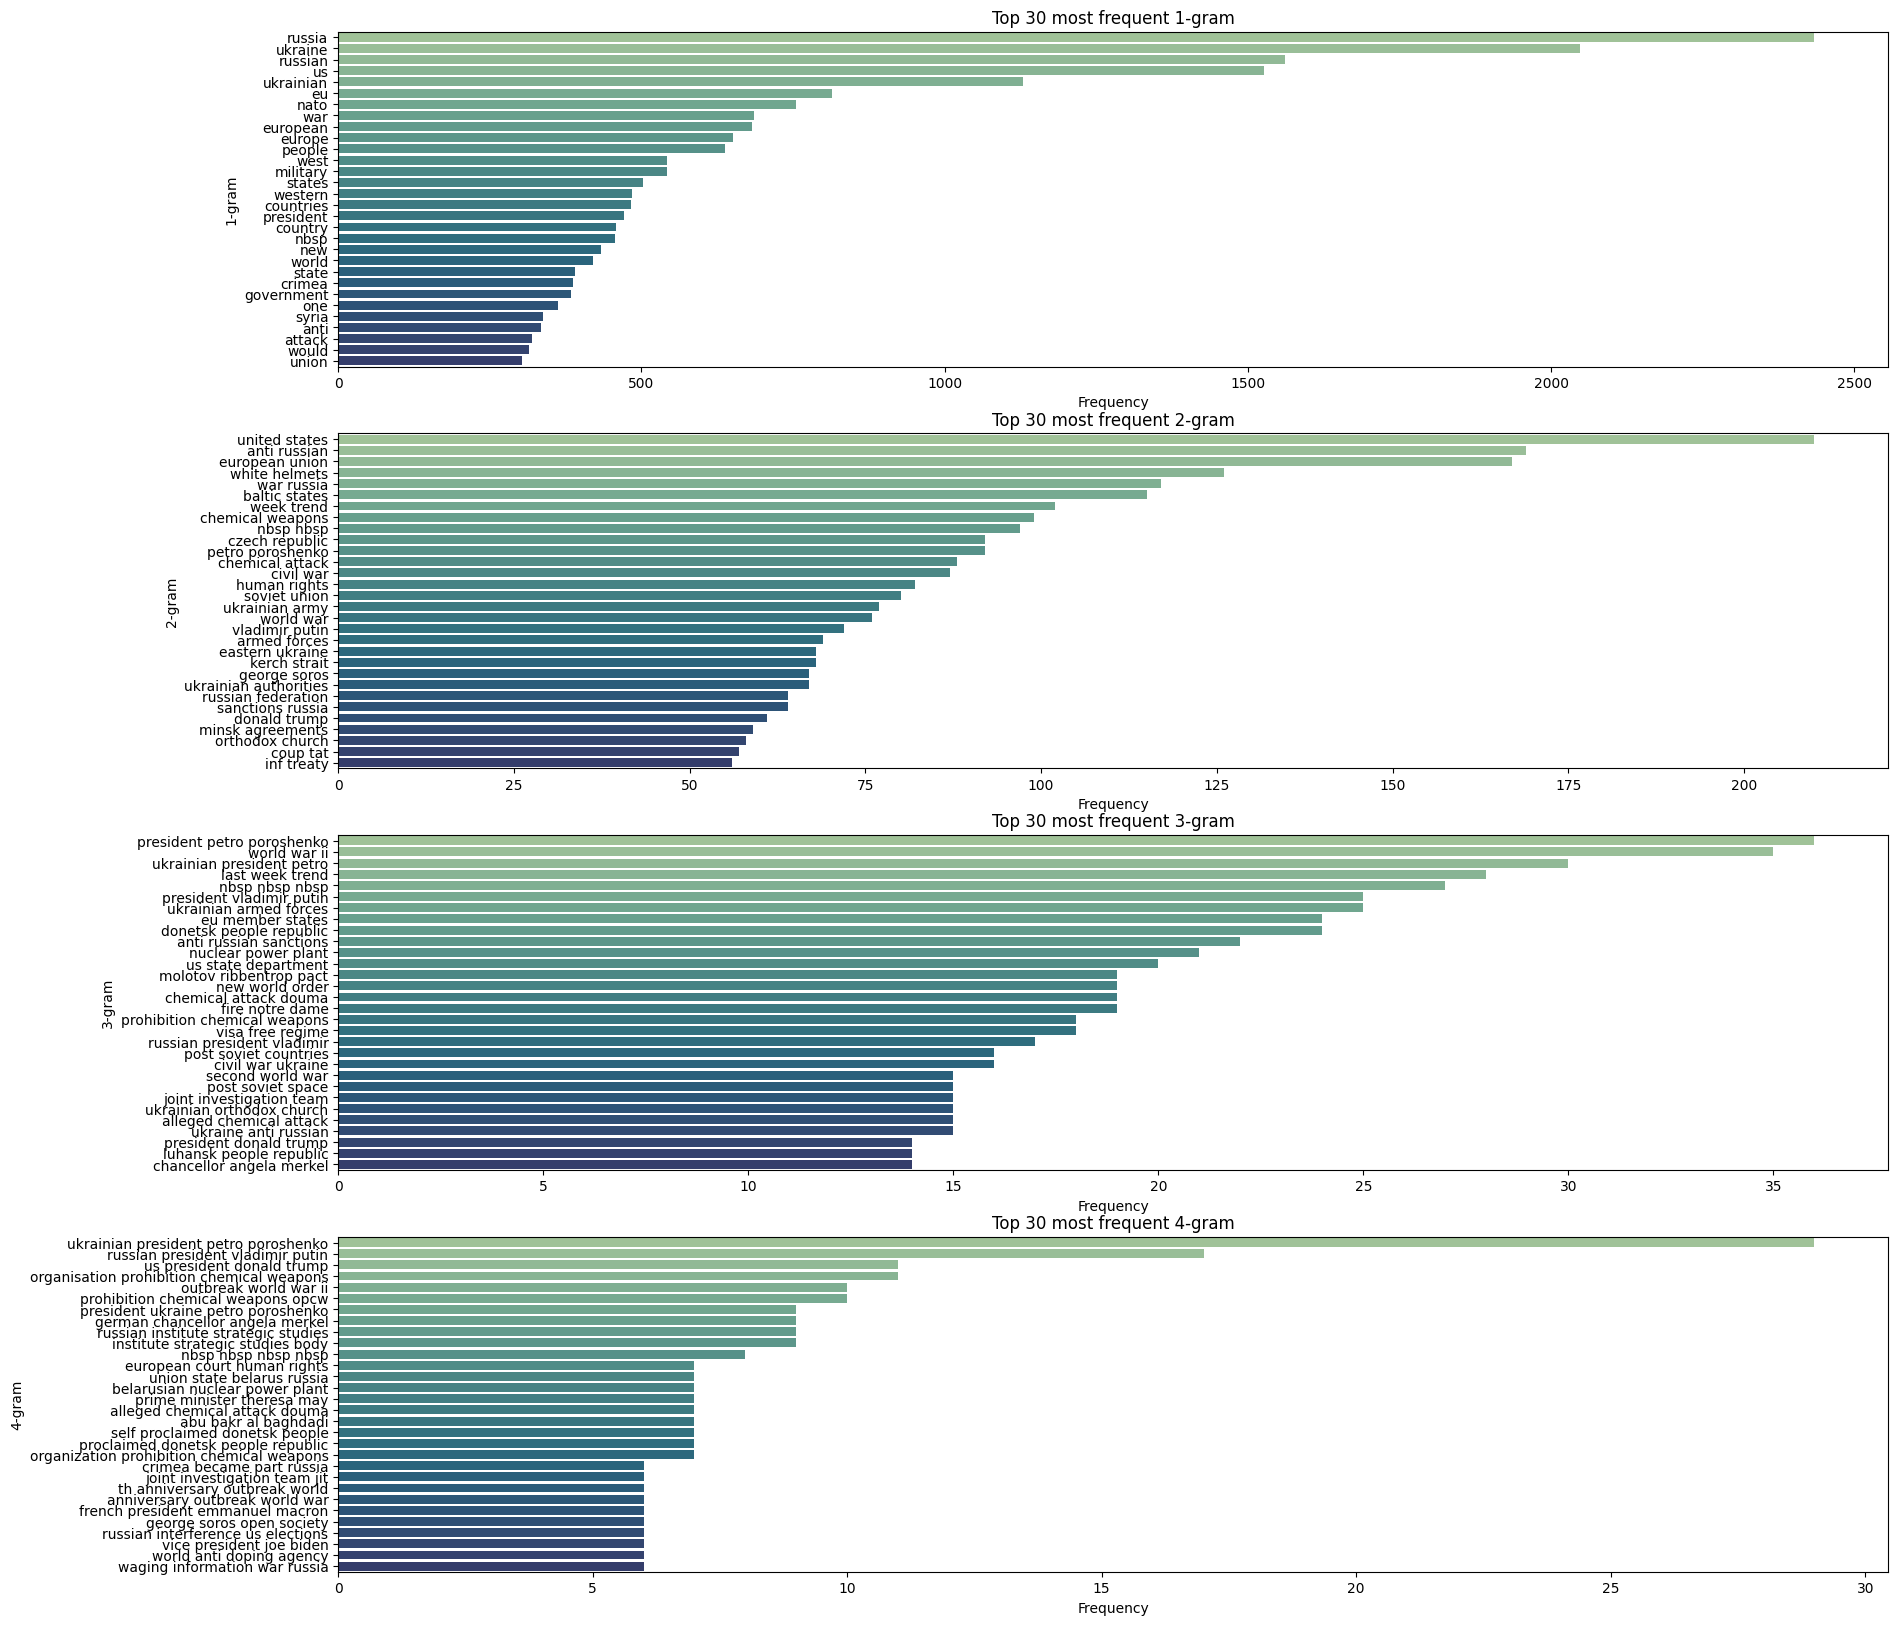

In [63]:
figure, axes = plt.subplots(4, figsize=(20, 20))
gram_sizes = range(1, 5)
for gram_size in gram_sizes:
    grams = get_n_grams(data['text'], gram_size, 30)
    plot_grams(grams, axes[(gram_size - 1)])
plt.show()